In [24]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
covid = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

In [26]:
covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,01/12/2020,1,12,2020,272,11,Afghanistan,AF,AFG,38041757.0,Asia,6.960772
1,30/11/2020,30,11,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,6.416633
2,29/11/2020,29,11,2020,228,11,Afghanistan,AF,AFG,38041757.0,Asia,6.845110
3,28/11/2020,28,11,2020,214,15,Afghanistan,AF,AFG,38041757.0,Asia,6.784650
4,27/11/2020,27,11,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,6.395604
...,...,...,...,...,...,...,...,...,...,...,...,...
59126,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
59127,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
59128,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
59129,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [27]:
covid.to_csv('covid_data.csv')

In [28]:
covid.drop("countryterritoryCode",axis=1,inplace=True)
covid.drop("day",axis=1,inplace=True)
covid.drop("month",axis=1,inplace=True)
covid.drop("year",axis=1,inplace=True)
covid.drop("popData2019",axis=1,inplace=True)
covid.drop("geoId",axis=1,inplace=True)

In [29]:
covid

,dateRep,cases,deaths,countriesAndTerritories,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,01/12/2020,272,11,Afghanistan,Asia,6.960772
1,30/11/2020,0,0,Afghanistan,Asia,6.416633
2,29/11/2020,228,11,Afghanistan,Asia,6.845110
3,28/11/2020,214,15,Afghanistan,Asia,6.784650
4,27/11/2020,0,0,Afghanistan,Asia,6.395604
...,...,...,...,...,...,...
59126,25/03/2020,0,0,Zimbabwe,Africa,NaN
59127,24/03/2020,0,1,Zimbabwe,Africa,NaN
59128,23/03/2020,0,0,Zimbabwe,Africa,NaN
59129,22/03/2020,1,0,Zimbabwe,Africa,NaN


In [30]:
covid.rename(columns={'dateRep':'date','countriesAndTerritories':'country', 'continentExp':'continent'}, inplace=True)

In [31]:
covid

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,01/12/2020,272,11,Afghanistan,Asia,6.960772
1,30/11/2020,0,0,Afghanistan,Asia,6.416633
2,29/11/2020,228,11,Afghanistan,Asia,6.845110
3,28/11/2020,214,15,Afghanistan,Asia,6.784650
4,27/11/2020,0,0,Afghanistan,Asia,6.395604
...,...,...,...,...,...,...
59126,25/03/2020,0,0,Zimbabwe,Africa,NaN
59127,24/03/2020,0,1,Zimbabwe,Africa,NaN
59128,23/03/2020,0,0,Zimbabwe,Africa,NaN
59129,22/03/2020,1,0,Zimbabwe,Africa,NaN


In [32]:
covid1 = covid.iloc[::-1]
covid1

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
59130,21/03/2020,1,0,Zimbabwe,Africa,NaN
59129,22/03/2020,1,0,Zimbabwe,Africa,NaN
59128,23/03/2020,0,0,Zimbabwe,Africa,NaN
59127,24/03/2020,0,1,Zimbabwe,Africa,NaN
59126,25/03/2020,0,0,Zimbabwe,Africa,NaN
...,...,...,...,...,...,...
4,27/11/2020,0,0,Afghanistan,Asia,6.395604
3,28/11/2020,214,15,Afghanistan,Asia,6.784650
2,29/11/2020,228,11,Afghanistan,Asia,6.845110
1,30/11/2020,0,0,Afghanistan,Asia,6.416633


In [33]:
covid1.head()

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
59130,21/03/2020,1,0,Zimbabwe,Africa,NaN
59129,22/03/2020,1,0,Zimbabwe,Africa,NaN
59128,23/03/2020,0,0,Zimbabwe,Africa,NaN
59127,24/03/2020,0,1,Zimbabwe,Africa,NaN
59126,25/03/2020,0,0,Zimbabwe,Africa,NaN


In [34]:
India = covid1[covid1["country"]=="India"]
India

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
25897,31/12/2019,0,0,India,Asia,NaN
25896,01/01/2020,0,0,India,Asia,NaN
25895,02/01/2020,0,0,India,Asia,NaN
25894,03/01/2020,0,0,India,Asia,NaN
25893,04/01/2020,0,0,India,Asia,NaN
...,...,...,...,...,...,...
25566,27/11/2020,43082,492,India,Asia,42.519354
25565,28/11/2020,41322,485,India,Asia,42.273309
25564,29/11/2020,41810,496,India,Asia,42.325270
25563,30/11/2020,38772,443,India,Asia,42.927135


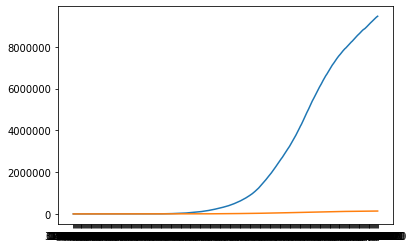

In [35]:
plt.plot(India["date"],India["cases"].cumsum())
plt.plot(India["date"],India["deaths"].cumsum())

<BarContainer object of 336 artists>

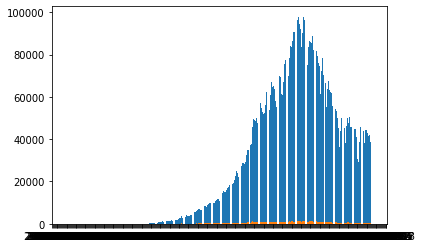

In [36]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India["cases"]
z_values = India["deaths"]
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.bar(x_values, y_values)
plt.bar(x_values, z_values)

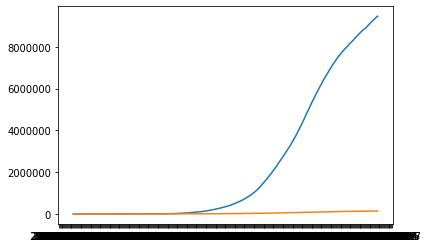

In [37]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India["cases"].cumsum()
z_values = India["deaths"].cumsum()
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, y_values)
plt.plot(x_values, z_values)
plt.savefig("cases_n_deaths_cumulative.png")

In [38]:
India

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
25897,31/12/2019,0,0,India,Asia,NaN
25896,01/01/2020,0,0,India,Asia,NaN
25895,02/01/2020,0,0,India,Asia,NaN
25894,03/01/2020,0,0,India,Asia,NaN
25893,04/01/2020,0,0,India,Asia,NaN
...,...,...,...,...,...,...
25566,27/11/2020,43082,492,India,Asia,42.519354
25565,28/11/2020,41322,485,India,Asia,42.273309
25564,29/11/2020,41810,496,India,Asia,42.325270
25563,30/11/2020,38772,443,India,Asia,42.927135


In [39]:
India.to_csv("India_covid.csv", index=False)

In [40]:
India_covid = pd.read_csv("India_covid.csv")
India_covid

,date,cases,deaths,country,continent,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,31/12/2019,0,0,India,Asia,NaN
1,01/01/2020,0,0,India,Asia,NaN
2,02/01/2020,0,0,India,Asia,NaN
3,03/01/2020,0,0,India,Asia,NaN
4,04/01/2020,0,0,India,Asia,NaN
...,...,...,...,...,...,...
331,27/11/2020,43082,492,India,Asia,42.519354
332,28/11/2020,41322,485,India,Asia,42.273309
333,29/11/2020,41810,496,India,Asia,42.325270
334,30/11/2020,38772,443,India,Asia,42.927135


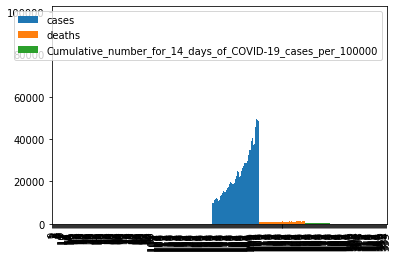

In [41]:
India_covid.plot.bar()

In [42]:
India_covid.drop("country",axis=1,inplace=True)
India_covid.drop("continent",axis=1,inplace=True)
India_covid

,date,cases,deaths,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,31/12/2019,0,0,NaN
1,01/01/2020,0,0,NaN
2,02/01/2020,0,0,NaN
3,03/01/2020,0,0,NaN
4,04/01/2020,0,0,NaN
...,...,...,...,...
331,27/11/2020,43082,492,42.519354
332,28/11/2020,41322,485,42.273309
333,29/11/2020,41810,496,42.325270
334,30/11/2020,38772,443,42.927135


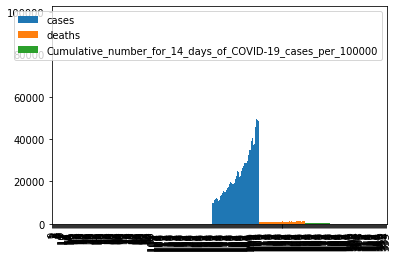

In [43]:
India_covid.plot.bar()

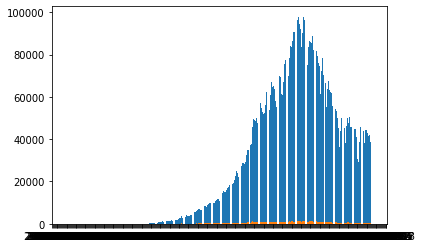

In [50]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India_covid["cases"]
z_values = India_covid["deaths"]
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India_covid["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.bar(x_values, y_values)
plt.bar(x_values, z_values)
plt.savefig("cases_n_deaths_daily.png")

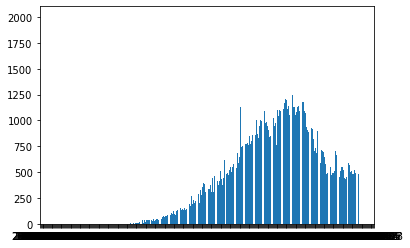

In [46]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
#y_values = India_covid["cases"]
z_values = India_covid["deaths"]
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India_covid["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
#plt.plot(x_values, y_values)
plt.bar(x_values, z_values)
plt.savefig("deaths_daily.png")

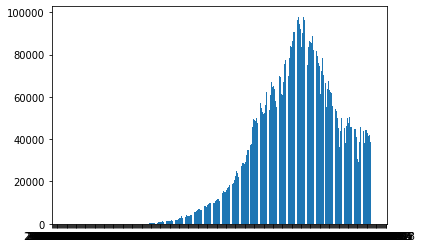

In [48]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India_covid["cases"]
#z_values = India_covid["deaths"]
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India_covid["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.bar(x_values, y_values)
#plt.plot(x_values, z_values)
plt.savefig("cases_daily.png")